In [2]:
import math
def digit_sum(n):
    sum = 0
    while n > 0:
        d = n % 10
        sum += d
        n //= 10
    return sum

def lucky_array(n):
    a = [False for i in range(n)]
    for i in range(n):
        if (i % 7 == 0) or (digit_sum(i) % 7 == 0):
            a[i] = True
        else:
            a[i] = False
    a[0] = False
    return a


In [ ]:
import math
def prime_array(n):
    a = [True for i in range(n)]
    a[0] = a[1] = False
    for i in range(math.floor(math.sqrt(n))):
        if a[i] == True:
            for j in range(2, math.floor(n / i)):
                a[i * j] = False
    b = []
    for i in range(n):
        if a[i]:
            b.append(i)
    return b

In [39]:
def rsum(a, r):
    sum = 0
    for i in range(len(a[r])):
        sum += a[r][i]
    return sum

def vsum(a, c):
    sum = 0
    for i in range(len(a)):
        sum += a[i][c]
    return sum

a = [[1,2,3],[10,20,30]]

def extend_sum(a):
    for i in range(len(a)):
        a[i].append(rsum(a, i))
    print(a)
    b = []
    for i in range(len(a[0])):
        b.append(vsum(a, i))
    print(b)
    c = [True for i in range(len(a)+1)]
    for i in range(len(a)):
        c[i] = a[i]
    c[len(c) -1] = b
    return c

print(extend_sum(a))

[[1, 2, 3, 6], [10, 20, 30, 60]]
[11, 22, 33, 66]
[[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]]


<IPython.core.display.Javascript object>


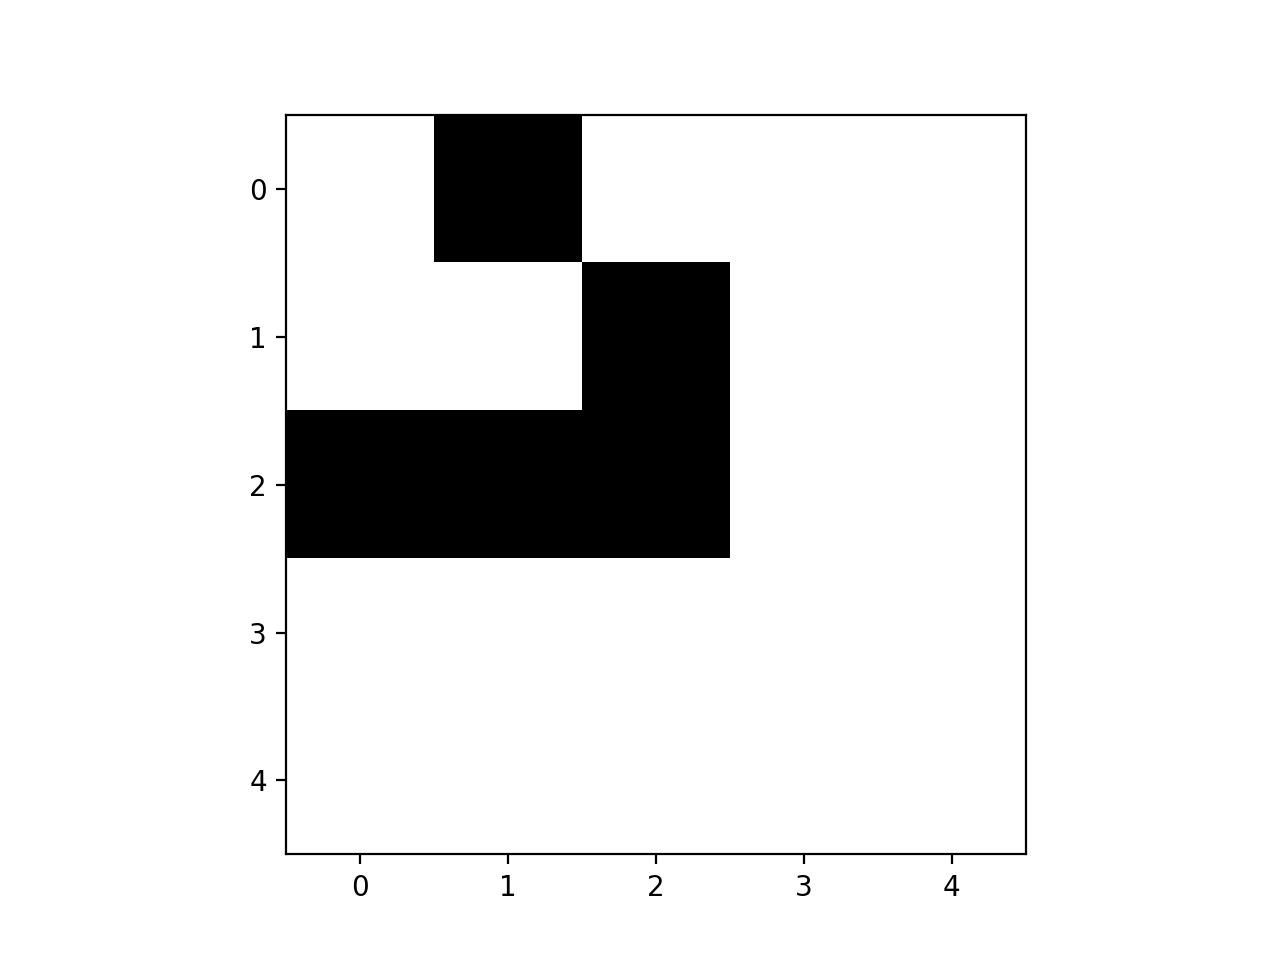

In [5]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def plot(array2d):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(array2d, interpolation="nearest", cmap="Greys") 
    fig.show() # fig.savefig("plot.pdf")a =plot(a)
    
def show_animation(initial_field,step): 
    a = []
    fig = plt.figure()
    field = initial_field
    for i in range(step): 
        a.append([plt.imshow(field)]) 
        field = next_field(field)
    anim = animation.ArtistAnimation(fig, a, interval=500) 
    plt.show()
    return anim


def make_field(height,width,living):
    a = [[False for i in range(width)] for j in range(height)]
    for i in range(len(living)):
        a[living[i][0]][living[i][1]] = True
    return a

def inside(field, r, c):
    if (0 <= r <= len(field) -1) and (0 <= c <= len(field[0])-1):
        return True
    else:
        return False

def is_living_cell(field, r, c):
    if inside(field, r, c) and field[r][c]:
        return 1
    else:
        return 0
    
def count(field, r, c):
    sum = 0
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            if (i != 0 or j != 0):
                if inside(field, r + i, c + j):
                    sum += is_living_cell(field, r + i, c + j)
    return sum

def next_cell_living(living, neighbor_count):
    if living:
        if 2 <= neighbor_count <= 3:
            return True
        else:
            return False
    else:
        if neighbor_count == 3:
            return True
        else:
            return False

def next_field(a):
    b = [[count(a, i, j)for j in range(len(a[0]))] for i in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a[i])):
            a[i][j] = next_cell_living(a[i][j], b[i][j])
    return a

a = make_field(5, 5, [[0,1], [1,2], [2,0], [2,1], [2,2]])
plot(a)
